In [2]:
%matplotlib inline
import pylab
import numpy as np
from scipy.spatial import distance
from math import sqrt

class Vector2(object):
    def __init__(self, x, y):
        """Create a vector, e.g. v = Vector2(10, 15)"""
        self.x = x
        self.y = y

    def magnitude(self):
        """Returns the magnitude of this vector."""
        return sqrt(self.x**2 + self.y**2)

    def __add__(self, other):
        """Returns the vector addition of self and other."""
        newx = self.x + other.x
        newy = self.y + other.y
        return Vector2(newx, newy)

    def __sub__(self, other):
        """Returns the vector difference of self and other."""
        newx = self.x - other.x
        newy = self.y - other.y
        return Vector2(newx, newy)

    def __mul__(self, other):
        """Multiplies each component if other is a scalar"""
        if type (other) == type(1) or type(other) == type(1.0):
            return Vector2(self.x * other, self.y * other)
        else:
            raise NotImplementedError
        
    def __rmul__(self, other):
        return self.__mul__(other)

    def __truediv__(self, other):
        """Divides each component if other is a scalar"""
        if type (other) == type(1) or type(other) == type(1.0):
            return Vector2(self.x / other, self.y / other)
        else:
            raise NotImplementedError

    def __str__(self):
        """Returns this vector as a string of the form: (x, y)"""
        return "(%(x)d, %(y)d)" % { "x": self.x, "y": self.y }

def intersection (c1, c2, r1, r2):
    
    if type(c1) != Vector2 or type(c2) != Vector2:
        raise TypeError("c1 and c2 must be vectors")
    
    D = (c1 - c2).magnitude()
    
    if D > r1 + r2:
        print('no intersection')
        return
    else:
        a = (r1**2 - r2**2 + D**2) / (2 * D)
        h = np.sqrt(r1**2 - a**2)
        p2 = c1 + a * (c2 - c1) / D
        if D == r1 + r2:
            return [p2]
        else:
            x_3 = p2.x + h * (c2.y - c1.y) / D
            y_3 = p2.y - h * (c2.x - c1.x) / D
            p3 = Vector2(x_3, y_3)
            
            x_4 = p2.x - h * (c2.y - c1.y) / D
            y_4 = p2.y + h * (c2.x - c1.x) / D
            p4 = Vector2(x_4, y_4)
            return [p3, p4]

#https://stackoverflow.com/questions/21859440/error-when-trying-to-overload-an-operator

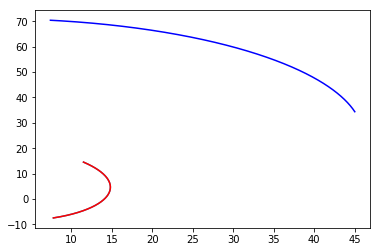

In [8]:
a = np.linspace(np.pi / 2, np.pi, num = 3000)
x = -28 * np.cos(a) + 22 * np.cos(0.77*a) 
y = -28 * np.sin(a) + 22 * np.sin(0.77*a)
pylab.plot(x,y)

solutions = list()
sol_x = list()
sol_y = list()


for i in range(0, 3000):
    result = intersection(Vector2(x[i], y[i]), Vector2(0, 25), 56, 46)
    if len(result) == 0:
        print('no valid solution')
    elif len(result) == 1:
        solutions.append(result[0])
        sol_x.append(result[0].x)
        sol_y.append(result[0].y)
    else:
        #determine which value to choose, choose the larger y value
        solution1 = result[0]
        solution2 = result[1]
        if solution1.x > solution2.x:
            solutions.append(solution1)
            sol_x.append(solution1.x)
            sol_y.append(solution1.y)
        else:
            solutions.append(solution2)
            sol_x.append(solution2.x)
            sol_y.append(solution2.y)
            
pylab.plot(x, y, 'r', sol_x[:], sol_y[:], 'b')

In [9]:
def anglebetween(v1, v2):
    dot = v1.x * v2.x + v1.y * v2.y
    costheta = dot / (v1.magnitude() * v2.magnitude())
    return np.arccos(costheta)

sensorangles = list()
for i in range(0, 3000):
    sensorvector = Vector2(sol_x[i], sol_y[i]) - Vector2(0, 25)
    sensorangles.append(anglebetween(sensorvector, Vector2(0, -1)))
    
fp = open('th.txt', 'w')
for i in range(0, 3000):
    fp.write(str(sensorangles[i]))
    fp.write(' ')
    fp.write(str(a[i]))
    fp.write('\n')
fp.close()